In [1]:
import sys

sys.path.append('../soft/')
sys.path.append('../firmware/')

from qick import *
from qick_training import *
from qick.averager_program import QickSweep
from qick.averager_program import QickRegister
from qick.averager_program import merge_sweeps

import numpy as np
from numpy.fft import fft, fftshift
import matplotlib.pyplot as plt

In [2]:
# Load bitstream with custom overlay
soc = QickTrainingSoc('../firmware/qick_training.bit')
soccfg = soc

print(soccfg)


QICK configuration:

	Board: ZCU216

	Software version: 0.2.184
	Firmware timestamp: Wed Sep  6 15:36:36 2023

	Global clocks (MHz): tProcessor 349.997, RF reference 245.760

	7 signal generator channels:
	0:	axis_sg_int4_v1 - tProc output 0, envelope memory 4096 samples
		DAC tile 2, blk 0, 16-bit DDS, fabric=307.200 MHz, f_dds=1228.800 MHz
	1:	axis_sg_int4_v1 - tProc output 1, envelope memory 4096 samples
		DAC tile 2, blk 1, 16-bit DDS, fabric=307.200 MHz, f_dds=1228.800 MHz
	2:	axis_sg_int4_v1 - tProc output 2, envelope memory 4096 samples
		DAC tile 2, blk 2, 16-bit DDS, fabric=307.200 MHz, f_dds=1228.800 MHz
	3:	axis_sg_int4_v1 - tProc output 3, envelope memory 4096 samples
		DAC tile 2, blk 3, 16-bit DDS, fabric=307.200 MHz, f_dds=1228.800 MHz
	4:	axis_signal_gen_v6 - tProc output 4, envelope memory 65536 samples
		DAC tile 3, blk 0, 32-bit DDS, fabric=307.200 MHz, f_dds=4915.200 MHz
	5:	axis_signal_gen_v6 - tProc output 5, envelope memory 65536 samples
		DAC tile 3, blk 2, 32-

## Resonator Tests
This example sets the Resonator Emulator Block for scanning with an external VNA. Examples include:
1. Disable all resonators to perform a wide-scan of the ADC-Resonator-DAC chain.
2. Enable one resonator to find it and perform phase-calibration with VNA.
3. Change resonator parameters (advanced mode).
4. Enable two resonators at the same time.

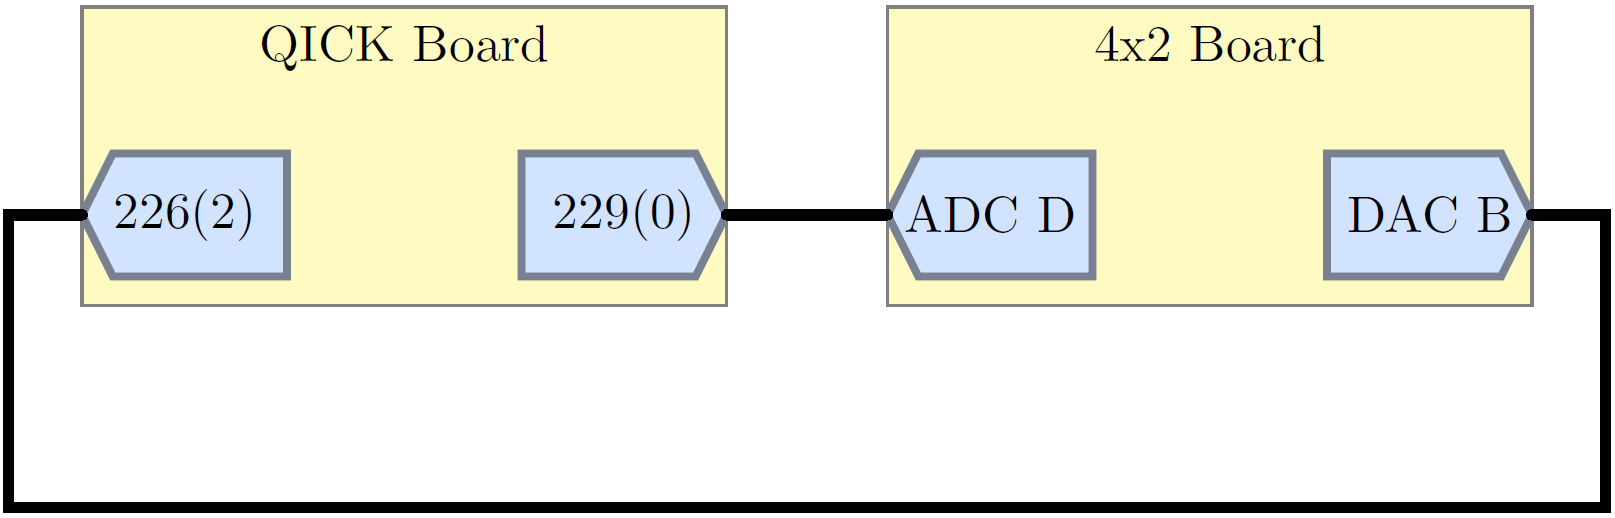

In [8]:
from IPython.display import Image, display
display(Image(filename='images/connections_demo04.png', embed=True))

In [3]:
######################################
### Build Resonator Emulator Chain ###
######################################
simu = SimuChain(soc,soc['simu'][0], name="226_2 <-> 229_0")

In [4]:
##############################
### Disable all resonators ###
##############################
simu.qout(3)
simu.synthesis.qout(1)

# Disable all resonators.
simu.alloff()

In [5]:
####################################################
### Enable one resonator with default parameters ###
####################################################
# Disable all resonators.
simu.alloff()

# Enable resonator.
simu.enable(499.3)

In [6]:
###################################
### Change resonator parameters ###
###################################
# Disable all resonators.
simu.alloff()

# Set parameters of resonator.
cfg = {'sel':'resonator', "freq":499.3, 'iir_c0':0.9, 'iir_c1':0.3}
simu.set_resonator(cfg)

In [7]:
######################################
### Enable two resonators together ###
######################################
# Disable all resonators.
simu.alloff()

# Enable resonator.
simu.enable(499.3)
simu.enable(503)